#### TMA4205 Numerical Linear Algebra
# Project Part 1
## Intruduction

In this project we solve the 2D Poisson equation

\begin{aligned}
\Delta u  &= f \quad \text{on} \quad D = [0,1]^2 \\
u &= g  \quad \text{on} \quad \partial D
\end{aligned}

numerically. The equation is discretized as a finite difference scheme using the five point stencil.
For each dimention we use $N+1$ nodes distance $h:=1/N$ from each other.

The disretetization of the Poisson eqation results in a system of linear equations. We then solve the linear sytem by three different methods: conjugate gradient, multigrid and multigrid preconditioned conjugate gradient.
Specificaly, a method working directly on the gridnodes will be used. Thus, we need not store the discrete Laplacian operator.

In [84]:
"""First define some useful functions for plotting and testing"""
%load_ext autoreload
%autoreload 2
# imports and useful functions
from linalg.convergence import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exercise 1:
In the cell below a version of the cponjugate gradiant algoritm working direclty onthe grid is implemented

In [85]:
from linalg.iterative import cg

In the cell below the test problem for exercise 1 is implemented. Here we also define the discrete laplacian wich will be used in the rest of the exercises.

In [86]:
from test.case_one import CaseOne
from linalg.laplacian import neg_discrete_laplacian

We now use the test case to test the implementation of conjugate gradient.
The tests are done with three grid sizes, where $N \in [32, 64, 128]$. The solution and a plot of the convergence history of $\frac{||r_k||_2}{||r_0||_2}$ is shown below.

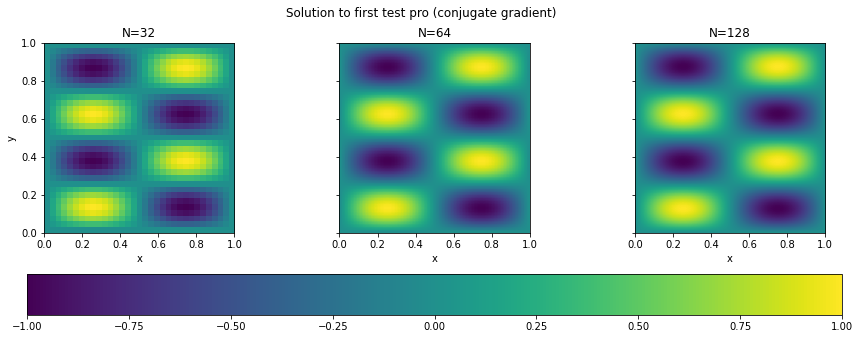

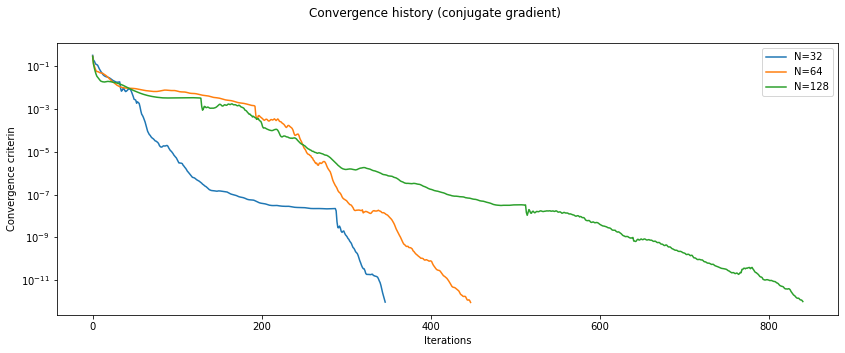

In [87]:
N_list = [32, 64, 128]

fig, axs = plt.subplots(ncols=len(N_list), sharey=True, figsize=(5 * len(N_list), 5))
fig.suptitle("Solution to first test pro (conjugate gradient)")

fig_conv, axs_conv = plt.subplots(1, figsize=(14, 5))
axs_conv.set_ylabel("Convergence criterion")
axs_conv.set_xlabel("Iterations")
fig_conv.suptitle("Convergence history (conjugate gradient)")

for i, N in enumerate(N_list):
    rhs = CaseOne.get_rhs(N)
    U_0 = CaseOne.get_u_0(N)
    U_num, conv_hist = cg(A=neg_discrete_laplacian, x_0=U_0, rhs=rhs, N=N, tol=1e-12, maxiter=3000, conv_hist=True)
    im = axs[i].imshow(U_num.T, origin="lower", extent=[0, 1, 0, 1], label=f"N={N}")

    axs[0].set_ylabel("y")
    axs[i].set_xlabel("x")
    axs[i].set_title(f"N={N}")
    axs_conv.semilogy(conv_hist, label=f"N={N}")

fig.colorbar(im, ax=axs, orientation="horizontal")
plt.legend()


**Remark:** Conjugate gradient did not converge with convergence criterion  $\frac{||r_k||_2}{||r_0||_2} < 10^{-12}$.
Therefore the algoritm resets $p$ and $r$ if statgnation is noticed.

**Remark:** As instructed by the teaching assistant, a plot of the convergence history is shown instead of the 2-norm of the residual.

##  Exercise 2
Define problem two for the rest of the exercises.

In [88]:
from test.case_two import CaseTwo

Implementation of multigrid:

In [89]:
from linalg.multigrid import *

We show the result of the first 5 applications of the multigrid solver.

/Users/alexander/git_repos/git_skole/num-linalg-project/linalg/iterative.py:14: RuntimeWarning: invalid value encountered in double_scalars
  while r_dot_r / r_dot_r_0 >= tol ** 2:


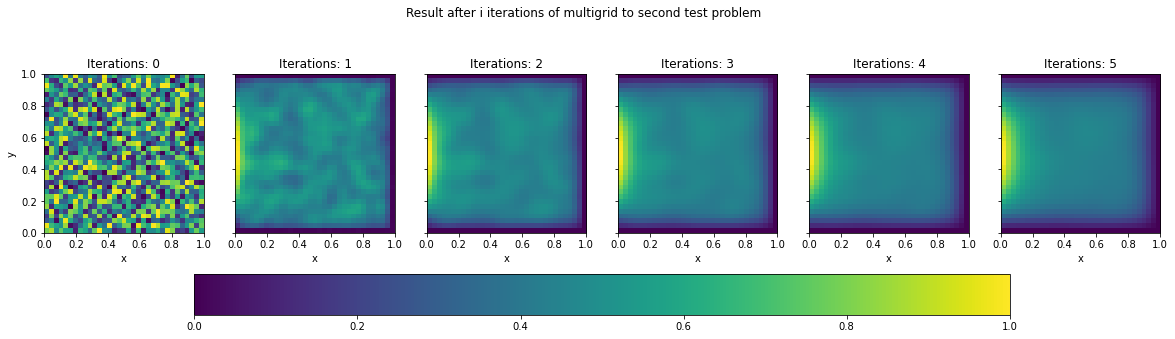

In [90]:
title = "Result after i iterations of multigrid to second test problem"
iterations = 5
N = 2 ** iterations
rhs = CaseTwo.get_rhs(N)
U_0 = CaseTwo.get_u_0(N)
fig =plot_first_iterations(iterations=iterations, method=mgv_minus_poisson,U_0=U_0, title=title,rhs=rhs, N=N, nu1=2, nu2=2, level=0, max_level=iterations )
# plt.legend()

Plot convergence history of $N=2^5$ for the multigrid solver:

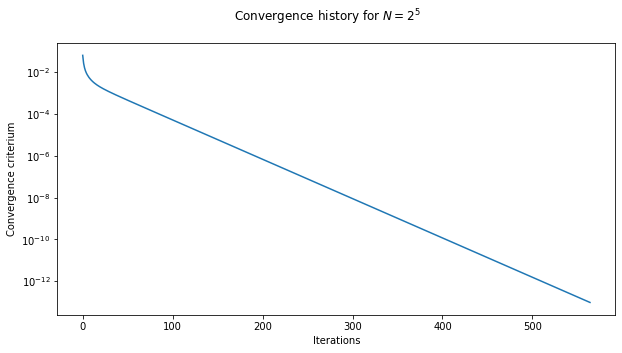

In [91]:
fig = plot_convergence(method=multigrid_minus_poisson, title="Convergence history for $N=2^5$", x_0=U_0, rhs=rhs, N=N,
                       nu1=2, nu2=2, level=0, max_level=iterations)

We now try the iterative multigrid solver on test problem 2 with grid size $N=2^L, L \in [5,6,7,8,9,10]$. The number of iterations to convergence for each $L$ is shwon below.

[ 32  64 128 256 512]
running for N=32
running for N=64
running for N=128
running for N=256
running for N=512


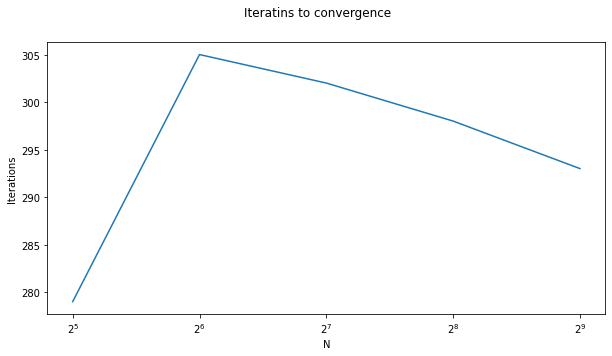

In [92]:
L_list = [5, 6,7,8, 9]
N_list = 2**np.array(L_list, dtype=np.int64)
print(N_list)
fig = plot_convergence_iters_to_convergence(method=multigrid_minus_poisson, case=CaseTwo, N_list=N_list,nu1=2, nu2=1, max_level=2)




## Exercise 3
We implement conjugate gradient with multigrid as a preconditioner. For this to work with conjugate gradient an iteration of multigrid must be postitive definite.
(This is explained in the book) TODO: Elaborate

Implementaion of multigrid prconditioned conjugate gradient:

In [93]:
from linalg.preconditioned import *

Find number of iterations to convergence different problem sizes:

[ 32  64 128 256 512]
running for N=32
running for N=64
running for N=128
running for N=256
running for N=512


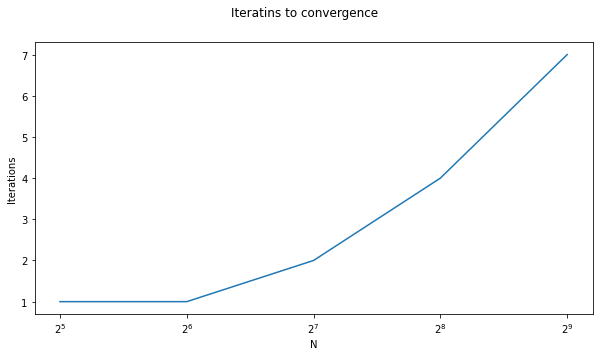

In [94]:
L_list = [5, 6,7,8,9]
N_list = 2**np.array(L_list, dtype=np.int64)
print(N_list)
fig = plot_convergence_iters_to_convergence(method=mgv_conditioned_cg_minus_poisson, case=CaseTwo, N_list=N_list,nu1=2, nu2=3)

